In [1]:
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:

# notebooks/example_notebook.ipynb

import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries


In [4]:
# Load environment variables from .env file
load_dotenv()

# Fetch database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")


c:\Users\HP\Desktop\Challenges\Telcom\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [6]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [39]:
duplicates = df['Bearer Id'].duplicated().sum()
print(duplicates)

# df['Bearer Id']=df['Bearer Id'].drop_duplicates()
# df.info()


15292


In [7]:

df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [24]:
df.isnull().mean()*100

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [11]:
df['Handset Type'].value_counts().head(10)


Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [12]:
# Aggregate per user (MSISDN)
user_aggregates = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data and number of sessions
user_aggregates['Total Data (Bytes)'] = user_aggregates['Total UL (Bytes)'] + user_aggregates['Total DL (Bytes)']
user_aggregates['Number of Sessions'] = df.groupby('MSISDN/Number')['Bearer Id'].nunique().values

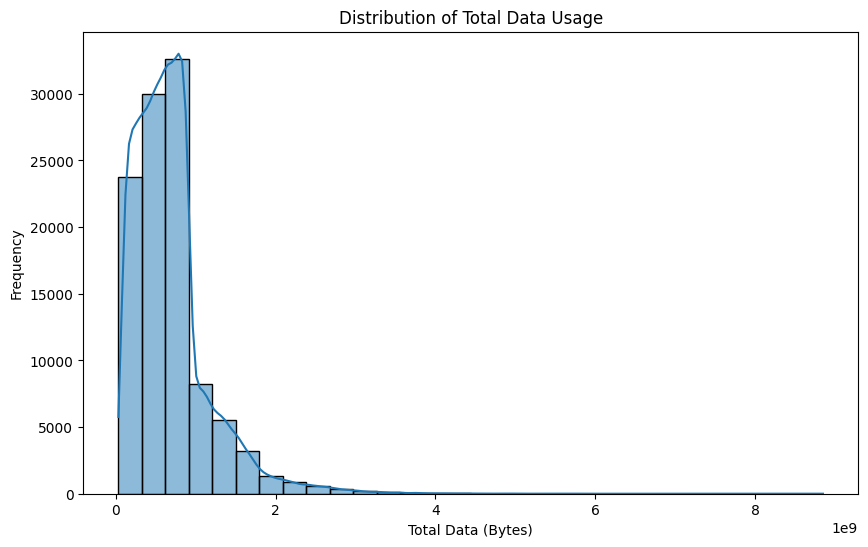

In [13]:
# Visualization: Distribution of Total Data
plt.figure(figsize=(10, 6))
sns.histplot(user_aggregates['Total Data (Bytes)'], bins=30, kde=True)
plt.title('Distribution of Total Data Usage')
plt.xlabel('Total Data (Bytes)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Step 4: Correlation Analysis
app_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
               'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
correlation_matrix = user_aggregates[app_columns].corr()

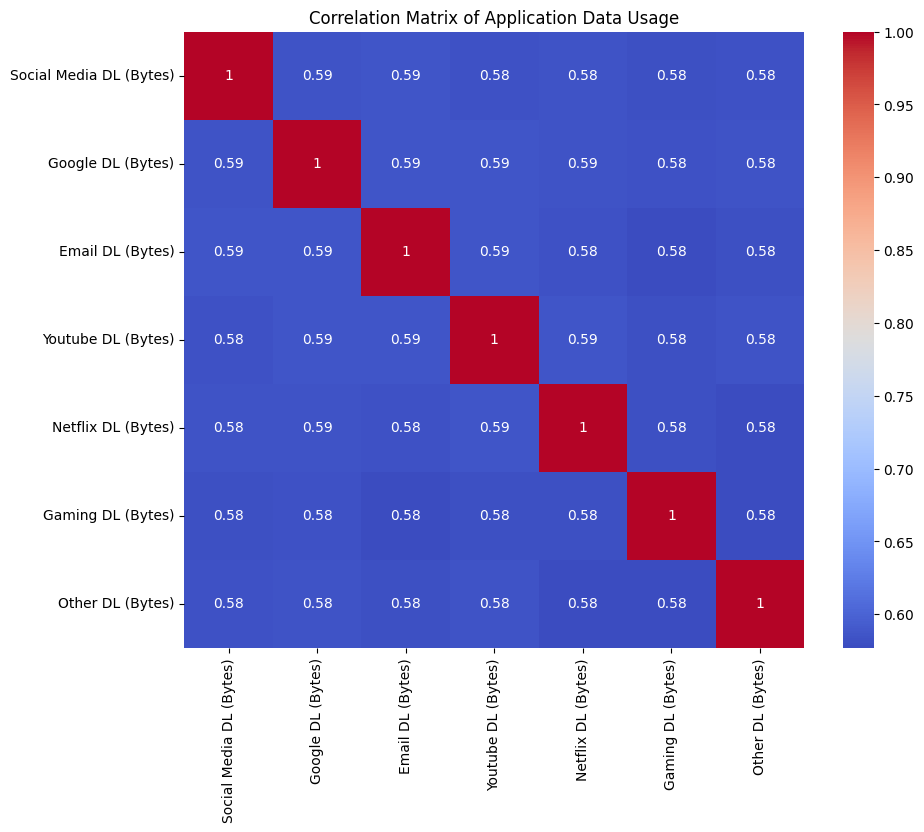

In [15]:
# Heatmap of correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Application Data Usage')
plt.show()

In [16]:
# Dimensionality Reduction (PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(user_aggregates[app_columns])

pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
user_aggregates['PCA1'] = pca_results[:, 0]
user_aggregates['PCA2'] = pca_results[:, 1]

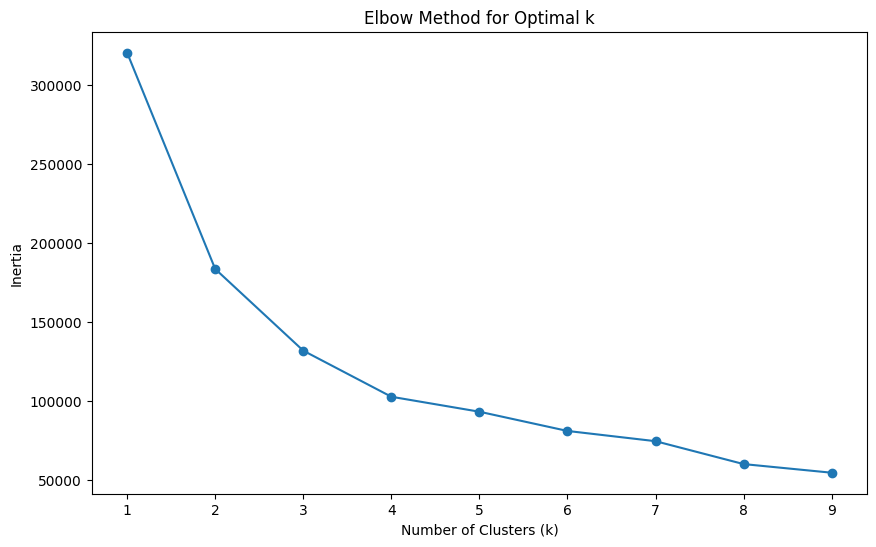

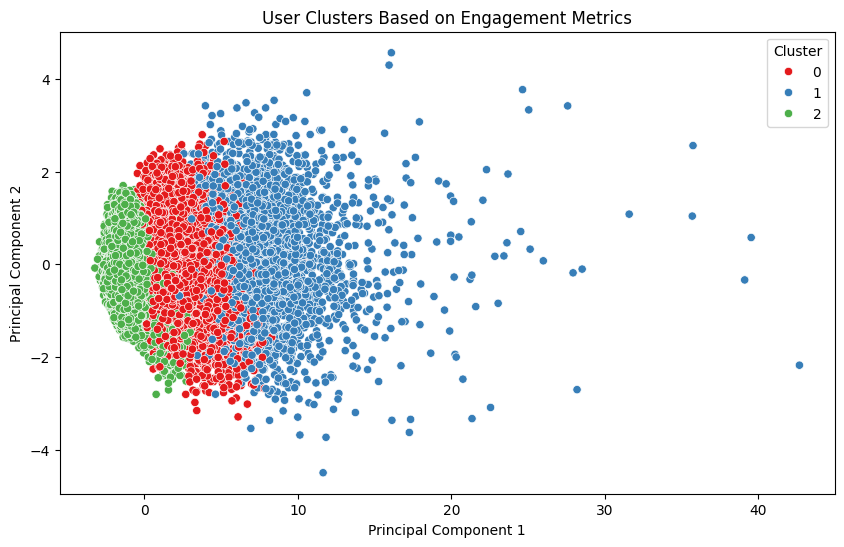

In [17]:
# Clustering (K-means)
engagement_metrics = user_aggregates[['Number of Sessions', 'Dur. (ms)', 'Total Data (Bytes)']]
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# K-means clustering with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
user_aggregates['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=user_aggregates, palette='Set1')
plt.title('User Clusters Based on Engagement Metrics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### SQL queries 

In [18]:
connection_string = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"


In [19]:
# Call SQL query function
results = execute_telecom_queries(connection_string)

# Print each result separately with clear formatting
for key, value in results.items():
    print(f"{key}:\n")
    
    # Check if the result is a DataFrame
    if isinstance(value, pd.DataFrame):
        print(value.to_string(index=False))  # Convert DataFrame to string without index
    else:
        print(value)  # Print other types directly
    
    print("\n" + "="*40 + "\n")  # Separator for clarity


unique_imsi_count:

 unique_imsi_count
            107265


average_duration:

 average_duration
    104608.560347


total_data_usage:

        IMSI  total_ul_bytes  total_dl_bytes
         NaN    2.350613e+10    2.580162e+11
2.082017e+14    6.894830e+08    8.156743e+09
2.082021e+14    7.034786e+08    7.811295e+09
2.082010e+14    7.295774e+08    7.770043e+09
2.082010e+14    5.815688e+08    7.309542e+09
2.082014e+14    6.696507e+08    7.301517e+09
2.082019e+14    6.242603e+08    7.081602e+09
2.082014e+14    4.050610e+08    6.903440e+09
2.082003e+14    5.215189e+08    6.610852e+09
2.082017e+14    4.712445e+08    6.400774e+09


avg_rtt_by_location:

   Last Location Name  avg_rtt_dl  avg_rtt_ul
              T10450C 6314.714286    4.571429
9.16456699821824E+015 6128.888889    6.444444
              D19121A 5553.166667    2.083333
              L88381B 1851.727273    9.909091
              T11119B  777.714286    5.500000
              D16786A  673.466667   22.866667
              D74535C  

###  EDA

In [20]:
# Display the first few rows
df.head()



,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [21]:
# Check for missing values
df.isnull().sum()


Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

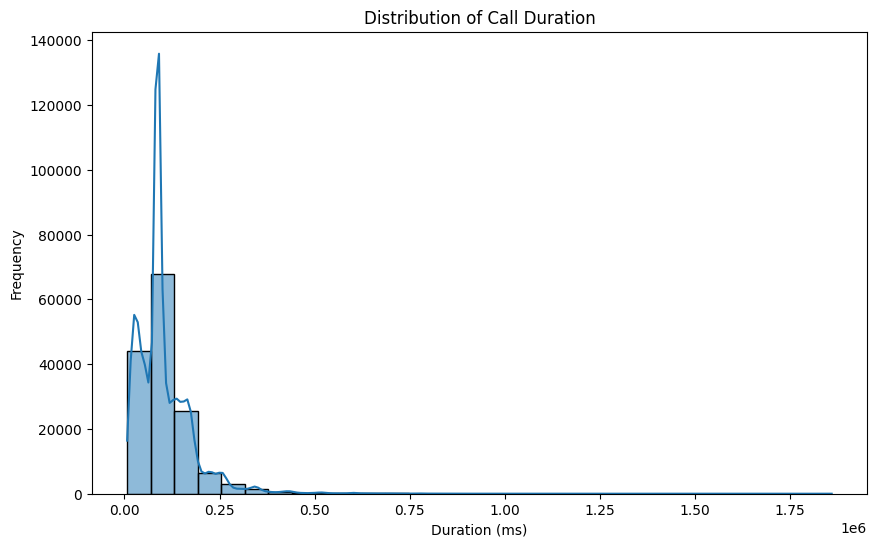

In [22]:
# Histogram for a specific column
plt.figure(figsize=(10, 6))
sns.histplot(df['Dur. (ms)'], bins=30, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Average duration by Last Location Name
avg_duration_by_location = df.groupby('Last Location Name')['Dur. (ms)'].mean().reset_index()
print(avg_duration_by_location.sort_values(by='Dur. (ms)', ascending=False))


         Last Location Name  Dur. (ms)
33951               T53539A  1177517.0
1342   CELL_208_20_520166_7  1134225.0
6056                D20985B  1038128.0
17025               D94074C  1010097.0
37089               T76656C   985972.0
...                     ...        ...
20518               G92776B     7327.0
18917               G52206C     7326.0
20510               G92604C     7267.0
18612               G30104B     7258.0
18635               G30532C     7146.0

[45547 rows x 2 columns]
